test.csv  
test_asm_image.csv  
test_data_750.csv  
test_dll.csv  
test_frequency.csv  
test_instr_frequency.csv  
  
trainLabels.csv  
train_asm_image.csv  
train_data_750.csv  
train_dll.csv  
train_frequency.csv  
train_instr_frequency.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

In [2]:
CLASSES = ["Ramnit",
           "Lollipop",
           "Kelihos_ver3",
           "Vundo",
           "Simda",
           "Tracur",
           "Kelihos_ver1",
           "Obfuscator.ACY",
           "Gatak"]

COLOR = ['#FF0000',
         '#FF7F00',
         '#FFFF00',
         '#00FF00',
         '#0000FF',
         '#4B0082',
         '#9400D3',
         '#AAAAAA',
         '#000000',]

In [3]:
label = [
    pd.read_csv("trainLabels.csv", index_col=0),
    pd.read_csv("test.csv", index_col=0)
]

In [4]:
label[0].shape

(315, 1)

In [5]:
label[1].shape

(63, 1)

In [6]:
train = [
    pd.read_csv("train_data_750.csv", index_col=0),
    pd.read_csv("train_dll.csv", index_col=0),
    pd.read_csv("train_frequency.csv", index_col=0),
    pd.read_csv("train_instr_frequency.csv", index_col=0),
    pd.read_csv("train_asm_image.csv", index_col=0)    
]

In [7]:
test = [
    pd.read_csv("test_data_750.csv", index_col=0),
    pd.read_csv("test_dll.csv", index_col=0),
    pd.read_csv("test_frequency.csv", index_col=0),
    pd.read_csv("test_instr_frequency.csv", index_col=0),
    pd.read_csv("test_asm_image.csv", index_col=0)    
]

In [8]:
names= ["4gram", 
        "dll", 
        'Frequency',
        "Instruction Frequency", 
        "A gray-scale image"]

accs = []

In [9]:
precision = []
recall = []

In [10]:
# Normalize both train and test data
def normalize(train, test):
    scaler = StandardScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return scaled_train, scaled_test

In [11]:
# Apply PCA with n components and reutrn PCA-ed train and test data
def applyPCA(train, test, n):
    pca = PCA(n_components=n)
    pca.fit(train)
    transformed_train = pca.transform(train)
    transformed_test = pca.transform(test)
    return transformed_train, transformed_test

In [12]:
# When given training and test data, return their corresponding labels
def getLabel(X_train, X_test, y_train, y_test):
    train = y_train.loc[X_train.index.array]
    train = train['Class'].to_numpy()
    train = train.astype('int')
    
    test = y_test.loc[X_test.index.array]
    test = test['Class'].to_numpy()
    test = test.astype('int')
    
    return train, test

In [13]:
# Visualization on 2D
def plot2D(data, label):
    c = [COLOR[x-1] for x in label]    
    plt.figure(figsize=(8,6))
    plt.scatter(data[:,0],data[:,1], c=c)
    plt.xlabel('1st PC')
    plt.ylabel('2nd PC')

In [14]:
# Visualization on 3D
def plot3D(data, label):
    c = [COLOR[x-1] for x in label]
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(data[:,0], data[:,1], data[:,2], c=c)
    plt.show()

# 4gram

In [15]:
nor_train, nor_test = normalize(train[0],test[0])

/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [16]:
X_train, X_test = applyPCA(nor_train, nor_test, 3)

In [17]:
y_train, y_test = getLabel(train[0],test[0],label[0], label[1])

## Appling PCA (n=3) for visualization prior to ML algorithm

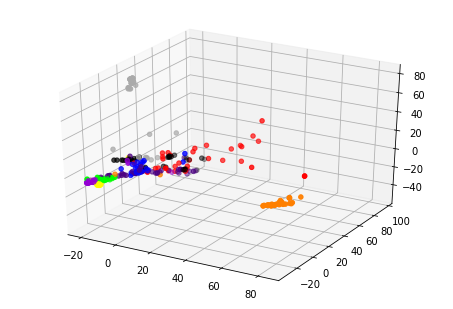

In [18]:
plot3D(X_train, y_train)

It turned out that PCA significantly deteriorates the model's accuracy.  
This was proved by testing KNN with PCA-ed data, which returns 20% of accuaracy.
Therefore, 

In [19]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(nor_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
predicted= KNN.predict(nor_test) 
accuracy = np.sum(predicted == y_test) * 1.0 / len(y_test)
accs.append(accuracy)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 0.920635


In [21]:
c = confusion_matrix(y_test, predicted)

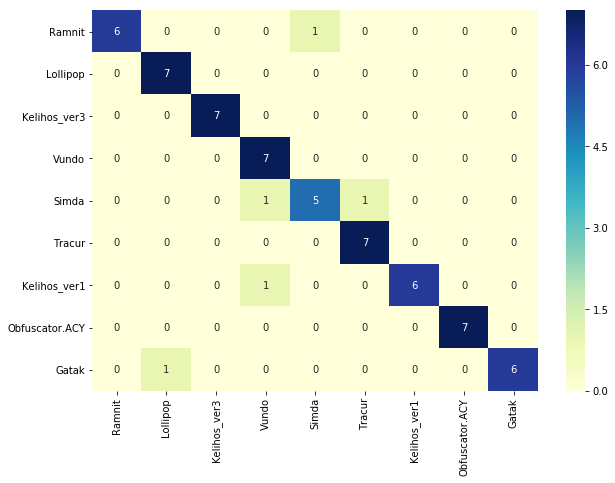

In [22]:
df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [23]:
# True Positive _ False Negative
# True Postivie _ False Positive
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision.append(tp*1.0/tp_fp)
recall.append(tp*1.0/tp_fn)

# dll

In [24]:
nor_train, nor_test = normalize(train[1],test[1])

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [25]:
X_train, X_test = applyPCA(nor_train, nor_test, 3)

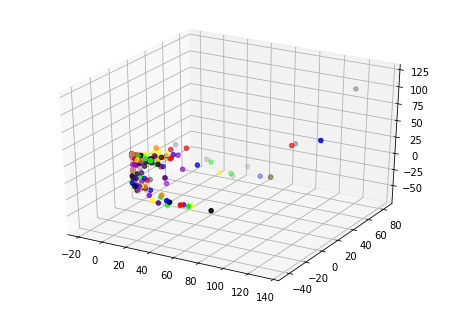

In [26]:
plot3D(X_train, y_train)

In [27]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(nor_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
predicted= KNN.predict(nor_test) 
accuracy = np.sum(predicted == y_test) * 1.0 / len(y_test)
accs.append(accuracy)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 0.158730


In [29]:
c = confusion_matrix(y_test, predicted)

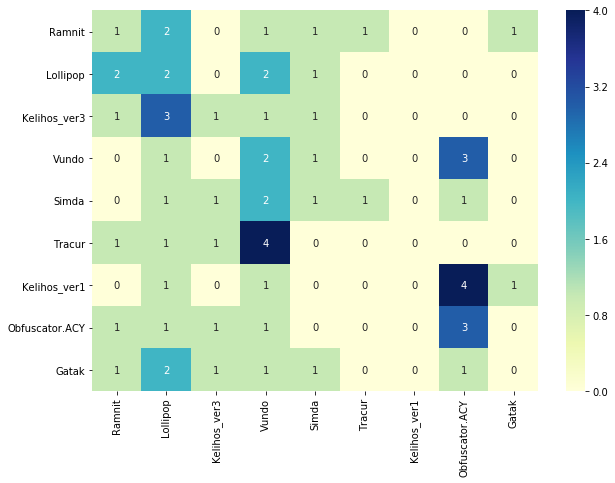

In [30]:
df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [31]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision.append(tp*1.0/tp_fp)
recall.append(tp*1.0/tp_fn)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


# Frequency

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


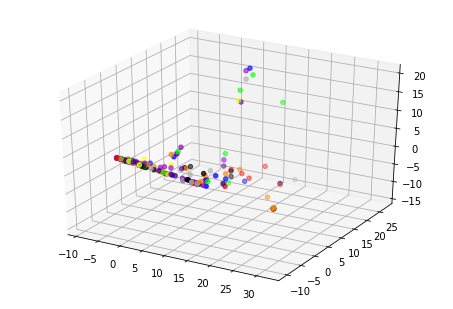

In [32]:
nor_train, nor_test = normalize(train[2],test[2])
X_train, X_test = applyPCA(nor_train, nor_test, 3)
plot3D(X_train, y_train)

In [33]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(nor_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
predicted= KNN.predict(nor_test) 
accuracy = np.sum(predicted == y_test) * 1.0 / len(y_test)
accs.append(accuracy)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 0.111111


In [35]:
c = confusion_matrix(y_test, predicted)

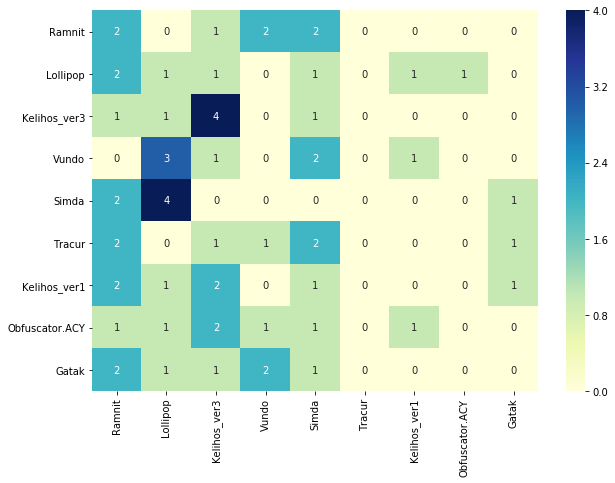

In [36]:
df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [37]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision.append(tp*1.0/tp_fp)
recall.append(tp*1.0/tp_fn)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


# Instruction Frequency
This data contains which operation, mnemonic, occurs how many times in each file  
Ex. jump, sub, add, mul, div

In [38]:
nor_train, nor_test = normalize(train[3],test[3])

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [39]:
X_train, X_test = applyPCA(nor_train, nor_test, 3)

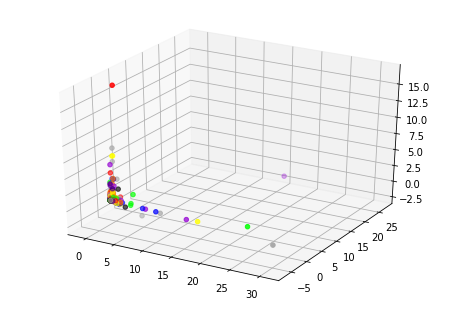

In [40]:
plot3D(X_train, y_train)

In [41]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(nor_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
predicted= KNN.predict(nor_test) 
accuracy = np.sum(predicted == y_test) * 1.0 / len(y_test)
accs.append(accuracy)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 0.095238


In [43]:
c = confusion_matrix(y_test, predicted)

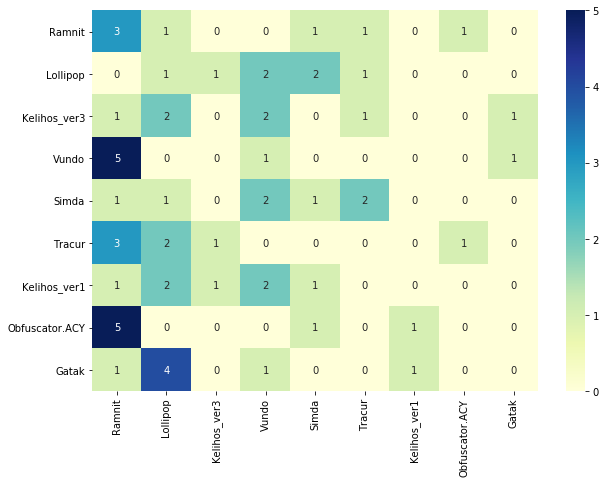

In [44]:
df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [45]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision.append(tp*1.0/tp_fp)
recall.append(tp*1.0/tp_fn)

# A gray-scale image (.btyes file)
A .bytes file can be converted into a gray-scale image,  
since a byte ranges from 0 to 255.  
0 indicates a black pixel, whereas 255 means a white pixel.

In [46]:
nor_train, nor_test = normalize(train[4],test[4])

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [47]:
X_train, X_test = applyPCA(nor_train, nor_test, 3)

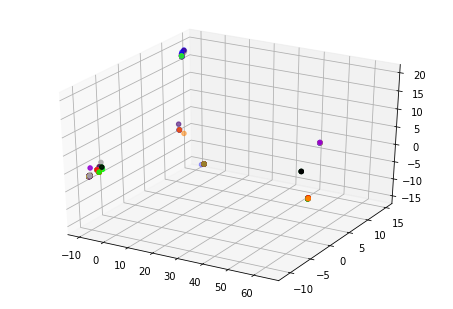

In [48]:
plot3D(X_train, y_train)

In [49]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(nor_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
predicted= KNN.predict(nor_test) 
accuracy = np.sum(predicted == y_test) * 1.0 / len(y_test)
accs.append(accuracy)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 0.190476


In [51]:
c = confusion_matrix(y_test, predicted)

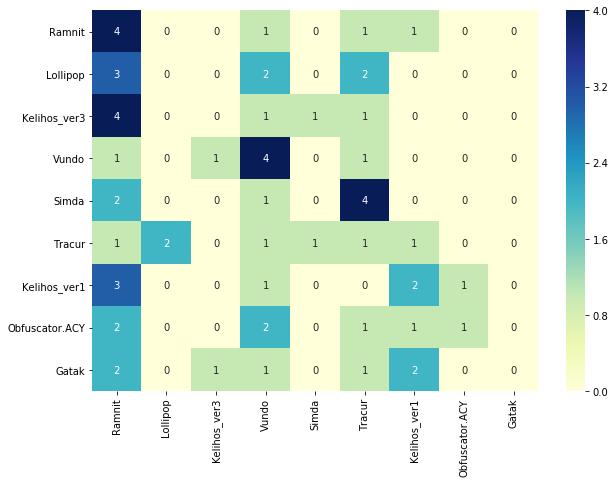

In [52]:
df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [53]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision.append(tp*1.0/tp_fp)
recall.append(tp*1.0/tp_fn)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


# Conclusion
Only 4gram performs well when used as a single feature.  
The remaining features should not be used alone for training.  
Therefore, we need to find out a good combination of features to improve our accuracy

In [54]:
pd.DataFrame(accs, index =names, columns =['Accuracy']) 

,Accuracy
4gram,0.920635
dll,0.158730
Frequency,0.111111
Instruction Frequency,0.095238
A gray-scale image,0.190476


### 4gram Precision & Recall

In [55]:
pd.DataFrame([precision[0], recall[0]], 
             columns = CLASSES,
             index=['Precision','Recall'])

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,1.000000,0.875,1.0,0.777778,0.833333,0.875,1.000000,1.0,1.000000
Recall,0.857143,1.000,1.0,1.000000,0.714286,1.000,0.857143,1.0,0.857143


### dll Precision & Recall

In [56]:
pd.DataFrame([precision[1], recall[1]], 
             columns = CLASSES,
             index=['Precision','Recall'])

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,0.142857,0.142857,0.200000,0.133333,0.166667,0.0,NaN,0.250000,0.0
Recall,0.142857,0.285714,0.142857,0.285714,0.142857,0.0,0.0,0.428571,0.0


### Frequencu

In [57]:
pd.DataFrame([precision[2], recall[2]], 
             columns = CLASSES,
             index=['Precision','Recall'])

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,0.142857,0.083333,0.307692,0.0,0.0,NaN,0.0,0.0,0.0
Recall,0.285714,0.142857,0.571429,0.0,0.0,0.0,0.0,0.0,0.0


### Instruction Frequency Precision & Recall

In [58]:
pd.DataFrame([precision[3], recall[3]], 
             columns = CLASSES,
             index=['Precision','Recall'])

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,0.150000,0.076923,0.0,0.100000,0.166667,0.0,0.0,0.0,0.0
Recall,0.428571,0.142857,0.0,0.142857,0.142857,0.0,0.0,0.0,0.0


### A gray-scall image Precision & Recall

In [59]:
pd.DataFrame([precision[4], recall[4]], 
             columns = CLASSES,
             index=['Precision','Recall'])

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,0.181818,0.0,0.0,0.285714,0.0,0.083333,0.285714,0.500000,NaN
Recall,0.571429,0.0,0.0,0.571429,0.0,0.142857,0.285714,0.142857,0.0
